<a href="https://colab.research.google.com/github/finiteautomata/sentiment-elecciones/blob/master/notebooks/Targeted_Sentiment_Analysis_Dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install datasets

In [21]:
import json

dataset_path = "dataset.json"

with open(dataset_path) as f:
    data = json.load(f)
    

In [22]:
data[:10]

[{'id': 23,
  'medio': 'la izquierda diario',
  'targets': [{'etiqueta': 'POS', 'nombre': 'la Izquierda', 'partido': 'FIT'}],
  'titulo': 'Barrio Aeroclub: la Izquierda propone urbanización y adjudicación de terrenos'},
 {'id': 24,
  'medio': 'la izquierda diario',
  'targets': [{'etiqueta': 'POS', 'nombre': 'la izquierda', 'partido': 'FIT'}],
  'titulo': 'Elecciones municipales: el #FITUnidad busca fortalecer la izquierda en la ciudad de Neuquén'},
 {'id': 31,
  'medio': 'la izquierda diario',
  'targets': [{'etiqueta': 'NEU',
    'nombre': 'Frente de Izquierda Unidad',
    'partido': 'FIT'}],
  'titulo': '[Videos] Mirá todos los spots del Frente de Izquierda Unidad en Mendoza'},
 {'id': 39,
  'medio': 'la nacion',
  'targets': [{'etiqueta': 'POS', 'nombre': 'Macri', 'partido': 'JXC'},
   {'etiqueta': 'NEG', 'nombre': 'peronismo', 'partido': 'FDT'}],
  'titulo': 'Entre el milagro de Macri y la grieta del peronismo'},
 {'id': 75,
  'medio': 'la izquierda diario',
  'targets': [{'etique

Convierto esto a un dataframe

In [23]:
len(data)

1976

In [24]:
set(t["medio"] for t in data)

{'ambito financiero',
 'clarin',
 'cronista',
 'el popular',
 'infobae',
 'la izquierda diario',
 'la nacion',
 'pagina 12',
 'perfil',
 'prensa obrera',
 'tiempo argentino'}

In [36]:
import string

def clean_name(name):
    name = name.strip()

    if not name[-1].isalpha():
        name = name[:-1]
    
    return name.strip()

set(clean_name(target["nombre"]).lower() for news in data for target in news["targets"])

{'alberto',
 'alberto f',
 'alberto fernandez',
 'alberto fernández',
 'cambiemos',
 'cfk',
 'consenso federal',
 'cristina',
 'cristina fernández',
 'cristina fernández de kirchner',
 'cristina kirchner',
 'cynthia hotton',
 'del caño',
 'del plá',
 'espert',
 'este gobierno',
 'fernández',
 'fit',
 'fit - unidad',
 'fit u',
 'fit unidad',
 'fit-u',
 'frente de izquierda',
 'frente de izquierda unidad',
 'frente de izquierda – unidad',
 'frente de izquierda-unidad',
 'frente de todos',
 'frente nos',
 'gobierno',
 'gobierno k',
 'gómez centurión',
 'hotton',
 'izquierda',
 'josé luis espert',
 'juan manuel urtubey',
 'juntos por el cambio',
 'kirchnerismo',
 'la izquierda',
 'la lista unidad del frente de izquierda',
 'lavagna',
 'lista unidad del frente de izquierda',
 'macri',
 'mauricio',
 'mauricio macri',
 'miguel pichetto',
 'miguel ángel pichetto',
 'nico del caño',
 'nicolás del caño',
 'peronismo',
 'pichetto',
 'pj',
 'pro',
 'pts-fit u',
 'roberto lavagna',
 'romina del pla

In [37]:
df_rows = []
for row in data:
    row = row.copy()
    targets = row.pop('targets')

    for target in targets:
        new_row = row.copy()
        new_row["target"] = clean_name(target["nombre"])
        new_row["label"] = target["etiqueta"]
        df_rows.append(new_row)

In [38]:
len(df_rows), len(data)

(2439, 1976)

In [39]:
import pandas as pd

df = pd.DataFrame(df_rows)

df

,titulo,id,medio,target,label
0,Barrio Aeroclub: la Izquierda propone urbaniza...,23,la izquierda diario,la Izquierda,POS
1,Elecciones municipales: el #FITUnidad busca fo...,24,la izquierda diario,la izquierda,POS
2,[Videos] Mirá todos los spots del Frente de Iz...,31,la izquierda diario,Frente de Izquierda Unidad,NEU
3,Entre el milagro de Macri y la grieta del pero...,39,la nacion,Macri,POS
4,Entre el milagro de Macri y la grieta del pero...,39,la nacion,peronismo,NEG
...,...,...,...,...,...
2434,"Resultados elecciones 2019: Alberto Fernández,...",22611,la nacion,Alberto Fernández,POS
2435,Elecciones 2019. La llamada de Macri a Alberto...,22612,la nacion,Macri,POS
2436,Video: el particular gesto de Cristina Kirchne...,22616,la nacion,Cristina Kirchner,NEU
2437,Mauricio Macri hizo una gran campaña y Alberto...,22617,la nacion,Mauricio Macri,POS


In [45]:
df.shape

(2439, 5)

In [46]:
df.groupby("id").count()["label"].value_counts()

1    1567
2     363
3      38
4       8
Name: label, dtype: int64

In [49]:
df["target"].value_counts().keys()

Index(['Alberto Fernández', 'Macri', 'Mauricio Macri', 'Cristina Kirchner',
       'Cristina', 'Alberto', 'Lavagna', 'Del Caño', 'Cambiemos',
       'Roberto Lavagna', 'peronismo', 'Alberto F', 'Fernández',
       'la izquierda', 'Pichetto', 'Juntos por el Cambio',
       'Frente de Izquierda Unidad', 'Gobierno', 'Frente de Izquierda',
       'kirchnerismo', 'Nicolás del Caño', 'Miguel Ángel Pichetto',
       'FIT Unidad', 'Frente de Todos', 'Urtubey', 'Espert', 'FIT',
       'Gómez Centurión', 'Miguel Pichetto', 'CFK', 'izquierda',
       'José Luis Espert', 'La izquierda', 'PJ', 'gobierno',
       'Cristina Fernández', 'La Izquierda', 'Nicolás Del Caño',
       'Cristina Fernández de Kirchner', 'FIT - Unidad', 'Juan Manuel Urtubey',
       'Mauricio', 'PRO', 'Frente de Izquierda-Unidad', 'Alberto Fernandez',
       'PTS-FIT U', 'Hotton', 'del Caño', 'FIT-U', 'macri',
       'Juntos por el cambio', 'lista Unidad del Frente de Izquierda',
       'Frente NOS', 'Cynthia Hotton', 'Fit', '

- 1567 con un único target
-  400 con 2 o más

Veamos qué onda la co-ocurrencia entre etiquetas

In [44]:
df["label"].value_counts()

POS    962
NEU    767
NEG    710
Name: label, dtype: int64

In [ ]:
labels = ["NEG", "NEU", "POS"]

co_ocurrence = pd.DataFrame(index=labels, columns=labels)
co_ocurrence = co_ocurrence.fillna(0)


for row in data:
    if len(row["targets"]) <= 1:
        continue
    
    targets = row["targets"]

    for i in range(len(targets)):
        t1 = targets[i]["etiqueta"]
        for j in range(i+1, len(targets)):
            t2 = targets[j]["etiqueta"]

            co_ocurrence.loc[t1, t2] += 1
            co_ocurrence.loc[t2, t1] += 1



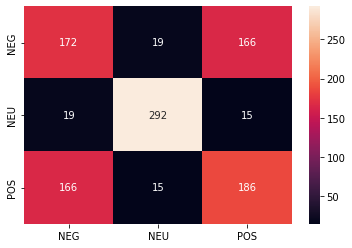

In [ ]:
import seaborn as sns

sns.heatmap(data=co_ocurrence, annot=True, fmt="d")

## Subimos a HF datasets

In [50]:
df = df.rename({"id": "id_noticia"}, axis=1)

In [51]:
from sklearn.model_selection import train_test_split

id_noticias = df.groupby("id_noticia").count()["label"]

train_ids, test_ids = train_test_split(id_noticias, stratify=id_noticias.values)
train_ids, dev_ids = train_test_split(train_ids, stratify=train_ids.values)

In [52]:
len(train_ids), len(dev_ids), len(test_ids)

(1111, 371, 494)

In [53]:
df_train = df[df["id_noticia"].isin(train_ids.index)]
df_dev = df[df["id_noticia"].isin(dev_ids.index)]
df_test = df[df["id_noticia"].isin(test_ids.index)]

df_train.shape, df_dev.shape, df_test.shape

((1371, 5), (459, 5), (609, 5))

In [54]:
df_train

,titulo,id_noticia,medio,target,label
0,Barrio Aeroclub: la Izquierda propone urbaniza...,23,la izquierda diario,la Izquierda,POS
1,Elecciones municipales: el #FITUnidad busca fo...,24,la izquierda diario,la izquierda,POS
2,[Videos] Mirá todos los spots del Frente de Iz...,31,la izquierda diario,Frente de Izquierda Unidad,NEU
3,Entre el milagro de Macri y la grieta del pero...,39,la nacion,Macri,POS
4,Entre el milagro de Macri y la grieta del pero...,39,la nacion,peronismo,NEG
...,...,...,...,...,...
2430,Mauricio Macri felicitó a Alberto Fernández po...,22600,la nacion,Mauricio Macri,POS
2431,Mauricio Macri felicitó a Alberto Fernández po...,22600,la nacion,Alberto Fernández,POS
2433,Declaración del Partido Obrero-Frente de Izqui...,22608,prensa obrera,Frente de Izquierda Unidad,NEU
2437,Mauricio Macri hizo una gran campaña y Alberto...,22617,la nacion,Mauricio Macri,POS


In [55]:
label2id = {"NEG": 0, "NEU": 1, "POS": 2}
df["label"] = df["label"].apply(lambda x: label2id[x])

In [56]:
df_train

,titulo,id_noticia,medio,target,label
0,Barrio Aeroclub: la Izquierda propone urbaniza...,23,la izquierda diario,la Izquierda,POS
1,Elecciones municipales: el #FITUnidad busca fo...,24,la izquierda diario,la izquierda,POS
2,[Videos] Mirá todos los spots del Frente de Iz...,31,la izquierda diario,Frente de Izquierda Unidad,NEU
3,Entre el milagro de Macri y la grieta del pero...,39,la nacion,Macri,POS
4,Entre el milagro de Macri y la grieta del pero...,39,la nacion,peronismo,NEG
...,...,...,...,...,...
2430,Mauricio Macri felicitó a Alberto Fernández po...,22600,la nacion,Mauricio Macri,POS
2431,Mauricio Macri felicitó a Alberto Fernández po...,22600,la nacion,Alberto Fernández,POS
2433,Declaración del Partido Obrero-Frente de Izqui...,22608,prensa obrera,Frente de Izquierda Unidad,NEU
2437,Mauricio Macri hizo una gran campaña y Alberto...,22617,la nacion,Mauricio Macri,POS


In [57]:
from datasets import Features, Value, Dataset, ClassLabel

features = Features({
    'titulo': Value('string'),
    'id_noticia': Value('int16'),
    'target': Value('string'),
    'label': ClassLabel(num_classes=3, names=["NEG", "NEU", "POS"])
})




df_train = df[df["id_noticia"].isin(train_ids.index)]
df_dev = df[df["id_noticia"].isin(dev_ids.index)]
df_test = df[df["id_noticia"].isin(test_ids.index)]

columns = ["titulo", "id_noticia", "target", "label"]

train_dataset = Dataset.from_pandas(df_train[columns], features=features)
dev_dataset = Dataset.from_pandas(df_dev[columns], features=features)
test_dataset = Dataset.from_pandas(df_test[columns], features=features)

In [58]:
from datasets import DatasetDict

dataset = DatasetDict(
    train=train_dataset,
    dev=dev_dataset,
    test=test_dataset,
)

In [59]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [60]:
dataset.push_to_hub("finiteautomata/tsa")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split dev to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]